In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import math
import seaborn as sns
figsize = (6,4)


import os

import chaospy as cp
import pandas as pd

import itertools
import scipy.stats as ss  

from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

In [2]:
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers   = ['o','v','s','d','+','*']
ordinal      = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']
figsize      = (4*1.5,3*1.5)
pltlinewidth = 1.0
return_period= [1,5,10]
prob_fails   = [1/(p *365.25*24*3600/1000) for p in return_period]
pf1year, pf5year, pf10year = prob_fails
n_mcs = 1.0/np.array(prob_fails)*100
print(n_mcs)


[ 3155760. 15778800. 31557600.]


In [3]:
MODEL_NAME      = 'bench4'
WORKING_DIR     = os.getcwd()
MODEL_DIR       = os.path.join('/Users/jinsongliu/BoxSync/MUSELab/museuq/examples', MODEL_NAME)
MODEL_DIR_FIGURE= os.path.join(MODEL_DIR,r'Figures')
MODEL_DIR_DATA  = os.path.join('/Users/jinsongliu/External/MUSE_UQ_DATA',MODEL_NAME,r'Data') 

print('WORKING_DIR: {}'.format(WORKING_DIR))
print('+-- MODEL: {}'.format(MODEL_DIR))
print('|   +-- {:<6s}: {}'.format('FIGURE',MODEL_DIR_FIGURE))
print('|   +-- {:<6s}: {}'.format('DATA',MODEL_DIR_DATA))


WORKING_DIR: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/JupyterNotebook
+-- MODEL: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench4
|   +-- FIGURE: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/bench4/Figures
|   +-- DATA  : /Users/jinsongliu/External/MUSE_UQ_DATA/bench4/Data


## Bench 4

<IPython.core.display.Javascript object>


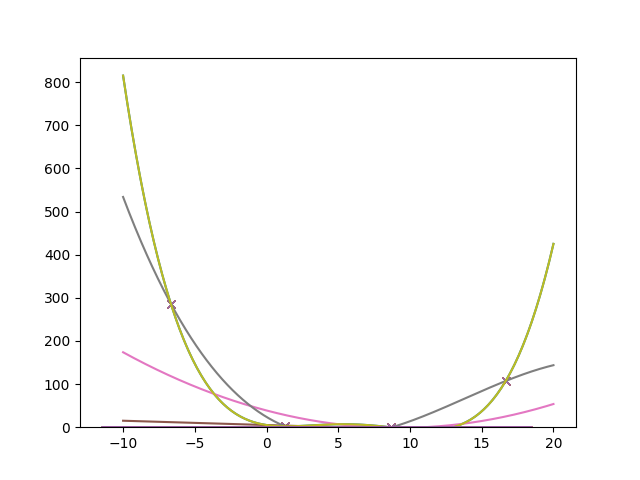

In [4]:
x = np.linspace(-10,20,100)
y = 5 + -5*x + 2.5*x**2 -0.36*x**3 + 0.015*x**4

fig = plt.figure()
plt.plot(x,y)


In [8]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4.npy'))
print(data_set)
train_u = data_set[0]
train_x = data_set[1]
train_w = data_set[2]
# print(np.polynomial.hermite_e.hermegauss(4))
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4_y.npy'))
train_y = data_set
# fig = plt.figure()
plt.plot(train_x,train_y,'x')
# print(mcs_x.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem2_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)


[[-2.33441422 -0.74196378  0.74196378  2.33441422]
 [-6.67207109  1.29018108  8.70981892 16.67207109]
 [ 0.11499371  1.13832042  1.13832042  0.11499371]]


In [9]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem3_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)


In [10]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem4_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)

In [11]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_plot_x.npy'))
plot_x = np.squeeze(data_set)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Hem5_PCE_GLK_plot_y.npy'))
plot_y = np.squeeze(data_set)

plt.plot(plot_x,plot_y)

## Ishigami


In [225]:
MODEL_NAME      = 'Ishigami'
WORKING_DIR     = os.getcwd()
MODEL_DIR       = os.path.join('/Users/jinsongliu/BoxSync/MUSELab/museuq/examples', MODEL_NAME)
MODEL_DIR_FIGURE= os.path.join(MODEL_DIR,r'Figures')
MODEL_DIR_DATA  = os.path.join('/Users/jinsongliu/External/MUSE_UQ_DATA',MODEL_NAME,r'Data') 

print('WORKING_DIR: {}'.format(WORKING_DIR))
print('+-- MODEL: {}'.format(MODEL_DIR))
print('|   +-- {:<6s}: {}'.format('FIGURE',MODEL_DIR_FIGURE))
print('|   +-- {:<6s}: {}'.format('DATA',MODEL_DIR_DATA))

WORKING_DIR: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/JupyterNotebook
+-- MODEL: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/Ishigami
|   +-- FIGURE: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/Ishigami/Figures
|   +-- DATA  : /Users/jinsongliu/External/MUSE_UQ_DATA/Ishigami/Data


In [226]:
# metrics = [ 'explained_variance_score','mean_absolute_error',
#            'mean_squared_error', 'median_absolute_error', 'r2_score', 'moment', 'mquantiles']


(10000,)
(10000,)
(10000,)


<IPython.core.display.Javascript object>


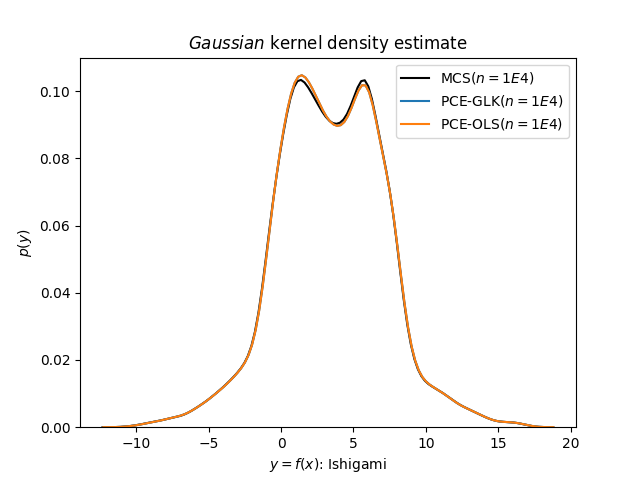

In [227]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4.npy'))
mcs_x = data_set
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_y.npy'))
mcs_y = data_set
print(mcs_y.shape)


data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg10_PCE_GLK_valid_y.npy'))
pce_glk_y = data_set
print(pce_glk_y.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg10_PCE_OLS_valid_y.npy'))
pce_ols_y = data_set
print(pce_ols_y.shape)
fig = plt.figure()
sns.distplot(mcs_y     ,hist=False, bins=100, label= 'MCS($n=1E4$)', color='k')
sns.distplot(pce_glk_y ,hist=False, bins=100, label= 'PCE-GLK($n=1E4$)')
sns.distplot(pce_ols_y ,hist=False, bins=100, label= 'PCE-OLS($n=1E4$)')
plt.title('$\it{Gaussian}$ kernel density estimate' )
plt.xlabel('$y=f(x)$: Ishigami')
plt.ylabel('$p(y)$')
plt.legend()

In [224]:
from scipy.stats import moment
data = np.random.randint(-3,10,1000)
a = moment(data, moment=0)

b = moment(data, moment=2)
# print(np.mean(data))
# print(np.std(data)**2)
print(a)
# print(b)

m =[1,2,3]
if 1 in m:
    print(np.where(np.array(m)==1)[0])

1.0
[0]


In [457]:
DoE_quad_orders = range(3,12)
xlim = (DoE_quad_orders[0],DoE_quad_orders[-1]+1)
mse_quad_pce_ols = []
mse_quad_pce_glk = []

moments_mcs = []
moments_quad_pce_ols = []
moments_quad_pce_glk = []

mquantiles_mcs = []
mquantiles_quad_pce_ols = []
mquantiles_quad_pce_glk = []

for iquad_order in DoE_quad_orders:
    data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg{:d}_PCE_OLS_valid_score.npy'.format(iquad_order)))
    print(data_set.shape)
    mse_quad_pce_ols.append(data_set[1,2])
    moments_mcs = data_set[0,5:9]
    moments_quad_pce_ols.append(data_set[1,5:9])
    mquantiles_mcs = data_set[0,9:]
    mquantiles_quad_pce_ols.append(data_set[1,9:])
    
    data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg{:d}_PCE_GLK_valid_score.npy'.format(iquad_order)))
    print(data_set.shape)    
    mse_quad_pce_glk.append(data_set[1,2])
    moments_quad_pce_glk.append(data_set[1,5:9])
    mquantiles_quad_pce_glk.append(data_set[1,9:])    
    
#     print(np.around(data_set,2))

moments_quad_pce_ols = np.array(moments_quad_pce_ols).T
mquantiles_quad_pce_ols = np.array(mquantiles_quad_pce_ols).T

moments_quad_pce_glk = np.array(moments_quad_pce_glk).T
mquantiles_quad_pce_glk = np.array(mquantiles_quad_pce_glk).T


(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)
(2, 12)
(2, 11)


In [458]:
print(mquantiles_quad_pce_glk.shape)

(2, 9)


In [464]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

alpha   = [1.0,1.1, 1.3, 1.5, 2.0,2.5, 3.0,3.5,5]
dist_u  = cp.Iid(cp.Uniform(-1,1),3)
opt_cri = 'S'
score   = []
for r in range(1):
    score_ip_ia = []
    for p in DoE_quad_orders:
        basis    = cp.orth_ttr(p,dist_u)
        score_ia = []
        for ia in alpha:
            num_basis= min(int(len(basis)*ia), 10000)
            filename = 'DoE_McsE4R{:d}_p{:d}_Opt{:s}{:d}_PCE_OLS_valid_score.npy'.format(0, p,opt_cri, num_basis)
            data_set = np.load(os.path.join(MODEL_DIR_DATA, filename))
#             print(data_set[0,5:9])
            ## mse [1,2]
            score_ia.append(data_set[1,2])
            ## moments
#             score_ia.append(data_set[1,5:9])
#             ## mquantiels 
#             score_ia.append(data_set[1,9:])
            
#         print(np.around(score_ia,2 ))
        score_ip_ia.append(score_ia)
#     print(np.around(score_ip_ia,2))
    score.append(score_ip_ia)
# print(np.array(score).shape)            
np.save(os.path.join(MODEL_DIR_DATA,'DoE_McsE4_Opt{:s}_PCE_OLS_mse.npy'.format(opt_cri)), np.array(score))

# np.save(os.path.join(MODEL_DIR_DATA,'DoE_McsE4_Opt{:s}_PCE_OLS_moments.npy'.format(opt_cri)), np.array(score))

# np.save(os.path.join(MODEL_DIR_DATA,'DoE_McsE4_Opt{:s}_PCE_OLS_mquantiles.npy'.format(opt_cri)), np.array(score))


In [358]:
print(len(range(3,9)))
print(len(alpha))

6
9


In [465]:
# DoE_quad_orders = np.arange(3,12, dtype=np.int64)
d = 3
num_basis   = []
num_samples = []
oversampling= []
for p in DoE_quad_orders:
    inum_basis = math.factorial(d+p)/ (math.factorial(d) * math.factorial(p))
    num_basis.append(inum_basis)
    inum_samples = (p+1)**d
    num_samples.append(inum_samples)
    oversampling.append(inum_samples / inum_basis)

In [466]:
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptD_PCE_OLS_mse.npy'))
mse_optD_pce_ols = data_set
print(mse_optD_pce_ols.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptD_PCE_OLS_moments.npy'))
moments_optD_pce_ols = data_set
print(moments_optD_pce_ols.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptD_PCE_OLS_mquantiles.npy'))
mquantiles_optD_pce_ols = data_set
print(mquantiles_optD_pce_ols.shape)


data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptS_PCE_OLS_mse.npy'))
mse_optS_pce_ols = data_set
print(mse_optS_pce_ols.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptS_PCE_OLS_moments.npy'))
moments_optS_pce_ols = data_set
print(moments_optS_pce_ols.shape)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McsE4_OptS_PCE_OLS_mquantiles.npy'))
mquantiles_optS_pce_ols = data_set
print(mquantiles_optS_pce_ols.shape)

(1, 9, 9)
(1, 9, 9, 4)
(1, 9, 9, 2)
(1, 9, 9)
(1, 9, 9, 4)
(1, 9, 9, 2)


<IPython.core.display.Javascript object>


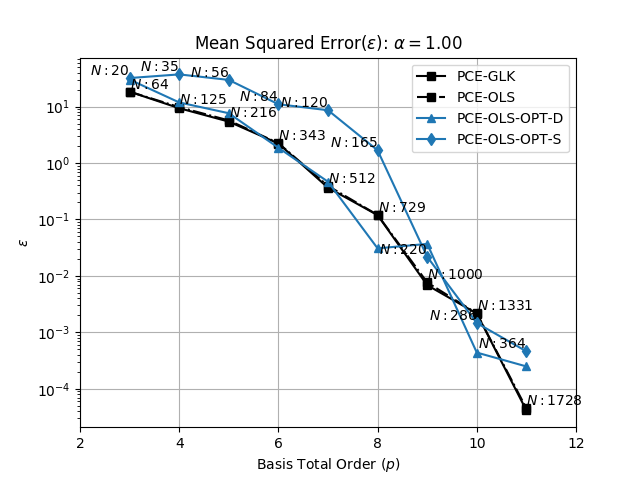

(9, 9)
(9, 9)


<IPython.core.display.Javascript object>


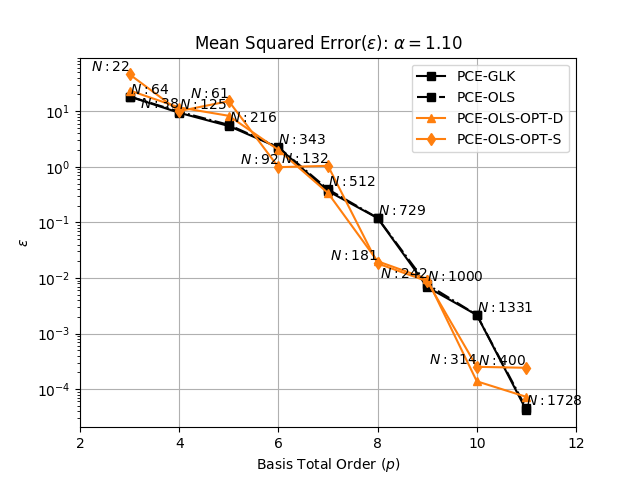

(9, 9)
(9, 9)


<IPython.core.display.Javascript object>


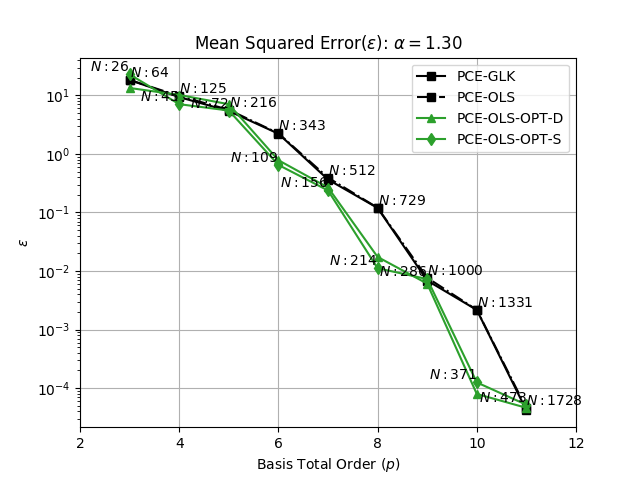

(9, 9)
(9, 9)


<IPython.core.display.Javascript object>


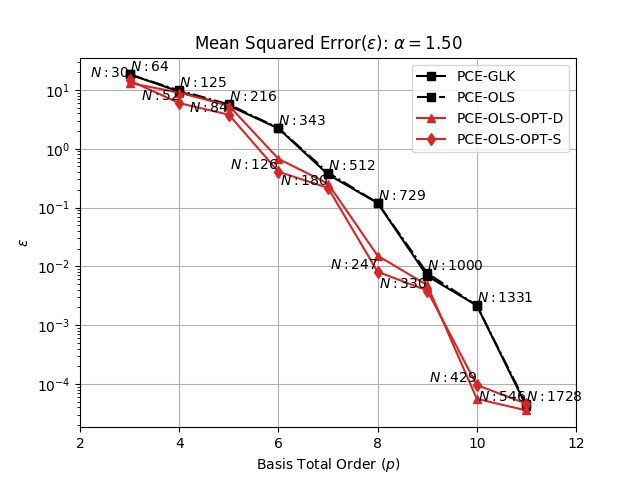

(9, 9)
(9, 9)


In [467]:
for i, ia in enumerate(alpha[:4]):
    fig = plt.figure()
    plt.plot(DoE_quad_orders, mse_quad_pce_glk,'sk-', label='PCE-GLK')
    plt.plot(DoE_quad_orders, mse_quad_pce_ols,'sk-.', label='PCE-OLS')
    for j, inum_samples in enumerate(num_samples):
        plt.text(DoE_quad_orders[j], mse_quad_pce_ols[j], r'$N:{:d}$'.format(inum_samples),horizontalalignment='left',verticalalignment='bottom')
#         text(xlim[1],mquantiles_mcs[0]*1.01,r'$\alpha=0.99$ (MCS:1E4)',horizontalalignment='right',verticalalignment='bottom')

    mse_optD_pce_ols_mean = np.mean(mse_optD_pce_ols, axis=0)
    print(mse_optD_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mse_optD_pce_ols_mean[:,i]), '^-', color=pltcolors[i], label='PCE-OLS-OPT-D')

    mse_optS_pce_ols_mean = np.mean(mse_optS_pce_ols, axis=0)
    print(mse_optS_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mse_optS_pce_ols_mean[:,i]), 'd-', color=pltcolors[i], label='PCE-OLS-OPT-S')
    
    for j, inum_basis in enumerate(num_basis):
        plt.text(DoE_quad_orders[j], mse_optS_pce_ols_mean[j,i], r'$N:{:d}$'.format(int(ia * inum_basis)),horizontalalignment='right',verticalalignment='bottom')
#         text(xlim[1],mquantiles_mcs[0]*1.01,r'$\alpha=0.99$ (MCS:1E4)',horizontalalignment='right',verticalalignment='bottom')

    plt.xlabel('Basis Total Order ($p$)')
    plt.ylabel('$\epsilon$')
    plt.title(r'Mean Squared Error($\epsilon$): $\alpha={:.2f}$'.format(ia))
    plt.xlim(2,12)
    plt.yscale('log')
    plt.grid()
    plt.legend()

In [451]:
print(mquantiles_optD_pce_ols_mean.shape)

(9, 9, 2)


<IPython.core.display.Javascript object>


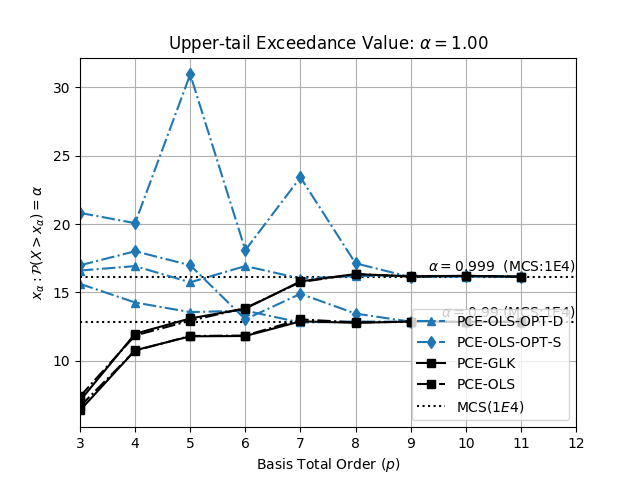

(9, 9, 2)
(9, 9, 2)
(9, 9, 2)
(9, 9, 2)


<IPython.core.display.Javascript object>


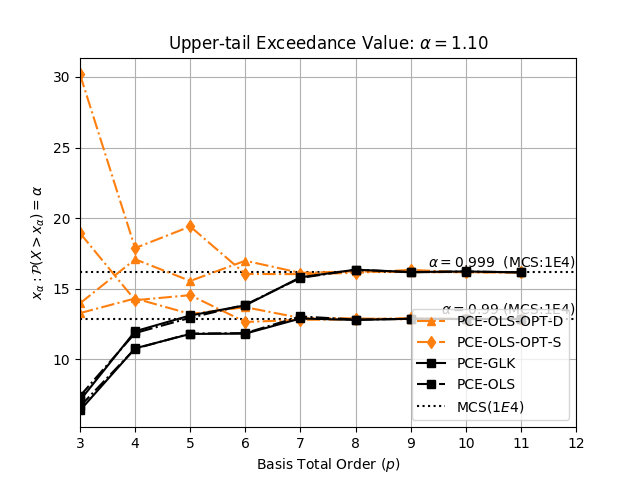

(9, 9, 2)
(9, 9, 2)
(9, 9, 2)
(9, 9, 2)


<IPython.core.display.Javascript object>


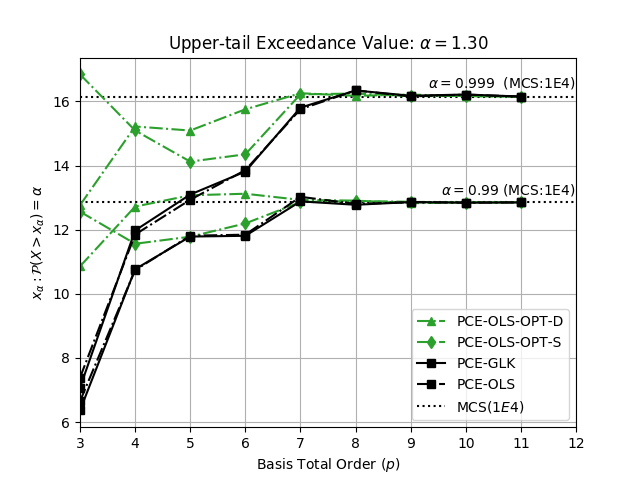

(9, 9, 2)
(9, 9, 2)
(9, 9, 2)
(9, 9, 2)


<IPython.core.display.Javascript object>


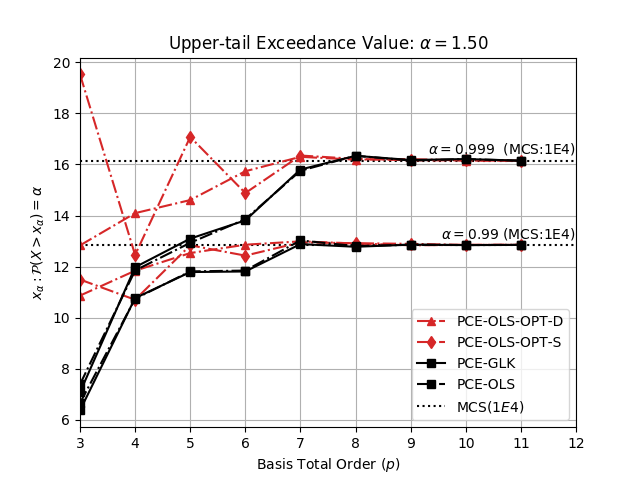

(9, 9, 2)
(9, 9, 2)
(9, 9, 2)
(9, 9, 2)


In [468]:
for i, ia in enumerate(alpha[:4]):
    fig = plt.figure()
    plt.hlines(mquantiles_mcs[0], xlim[0],xlim[-1], linestyles=':', label='MCS($1E4$)')
    plt.text(xlim[1],mquantiles_mcs[0]*1.01,r'$\alpha=0.99$ (MCS:1E4)',horizontalalignment='right',verticalalignment='bottom')

    plt.hlines(mquantiles_mcs[1], xlim[0],xlim[-1], linestyles=':')
    plt.text(xlim[1],mquantiles_mcs[1]*1.01,r'$\alpha=0.999$  (MCS:1E4)',horizontalalignment='right',verticalalignment='bottom')

    mquantiles_optD_pce_ols_mean = np.mean(mquantiles_optD_pce_ols, axis=0)
    print(mquantiles_optD_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mquantiles_optD_pce_ols_mean[:,i,0]), '^-.', color=pltcolors[i], label='PCE-OLS-OPT-D')
    mquantiles_optD_pce_ols_mean = np.mean(mquantiles_optD_pce_ols, axis=0)
    print(mquantiles_optD_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mquantiles_optD_pce_ols_mean[:,i,1]), '^-.', color=pltcolors[i])

    
    mquantiles_optS_pce_ols_mean = np.mean(mquantiles_optS_pce_ols, axis=0)
    print(mquantiles_optS_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mquantiles_optS_pce_ols_mean[:,i,0]), 'd-.', color=pltcolors[i], label='PCE-OLS-OPT-S')

    mquantiles_optS_pce_ols_mean = np.mean(mquantiles_optS_pce_ols, axis=0)
    print(mquantiles_optS_pce_ols_mean.shape)
    plt.plot(DoE_quad_orders, np.squeeze(mquantiles_optS_pce_ols_mean[:,i,1]), 'd-.', color=pltcolors[i])

    plt.plot(DoE_quad_orders, mquantiles_quad_pce_glk[0], 'sk-', label='PCE-GLK')
    plt.plot(DoE_quad_orders, mquantiles_quad_pce_ols[0], 'sk-.',label='PCE-OLS')

    plt.plot(DoE_quad_orders, mquantiles_quad_pce_glk[1], 'sk-')
    plt.plot(DoE_quad_orders, mquantiles_quad_pce_ols[1], 'sk-.')

    plt.xlabel('Basis Total Order ($p$)')
    plt.ylabel(r'$x_{\alpha} : \mathcal{P}(X>x_{\alpha}) = \alpha$')
    plt.title(r'Upper-tail Exceedance Value: $\alpha={:.2f}$'.format(ia))
    plt.xlim(xlim)
    plt.grid()
    plt.legend(loc=4)

<IPython.core.display.Javascript object>


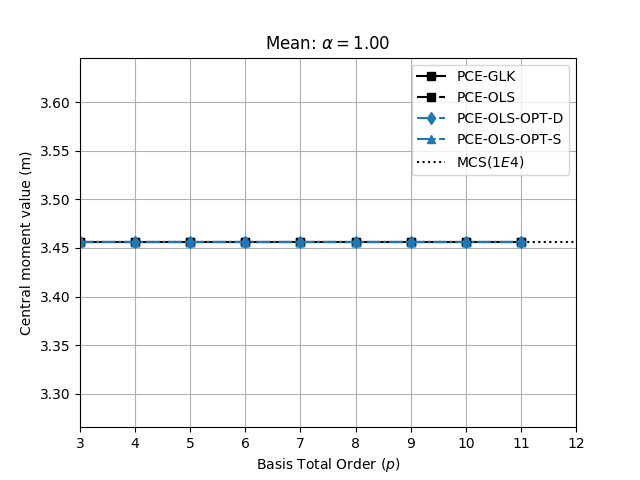

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


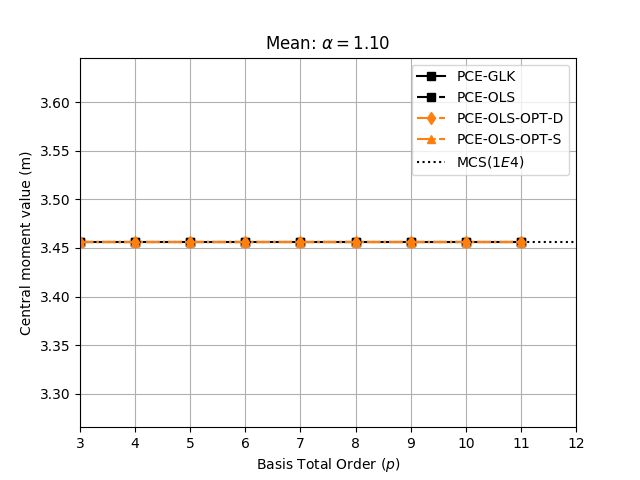

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


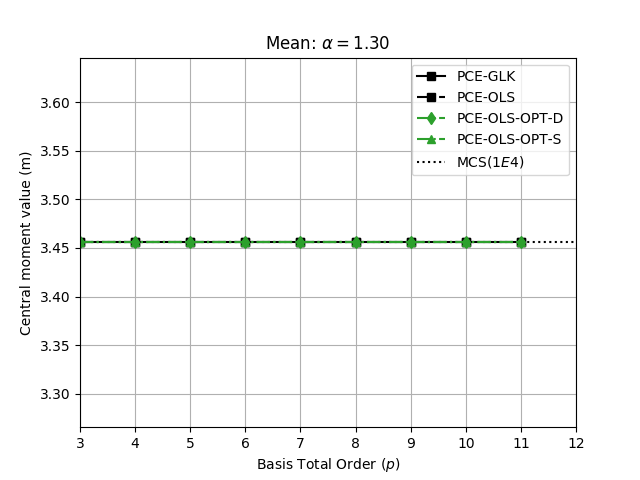

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


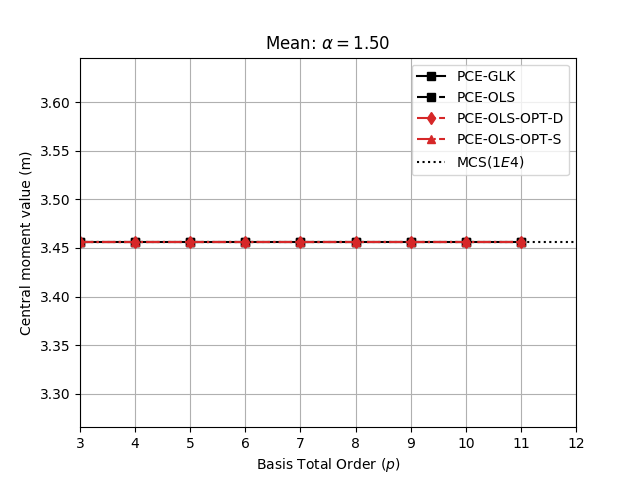

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


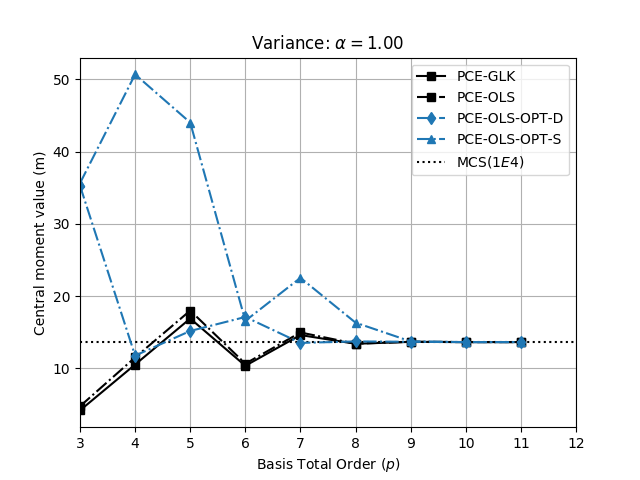

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


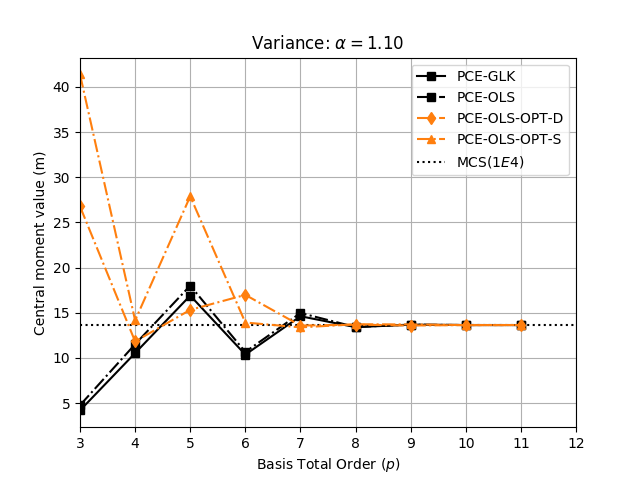

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


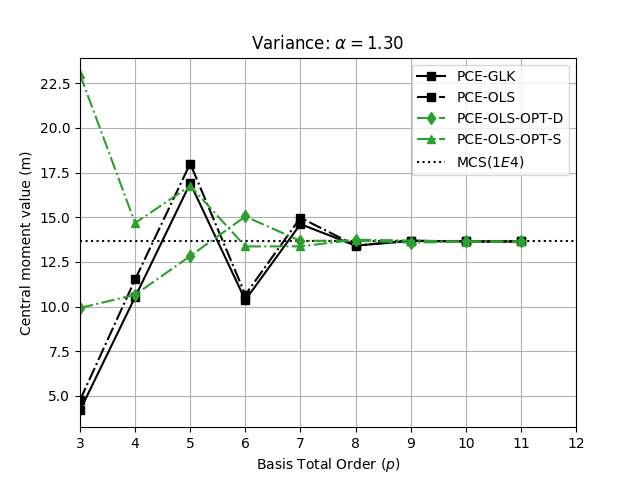

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


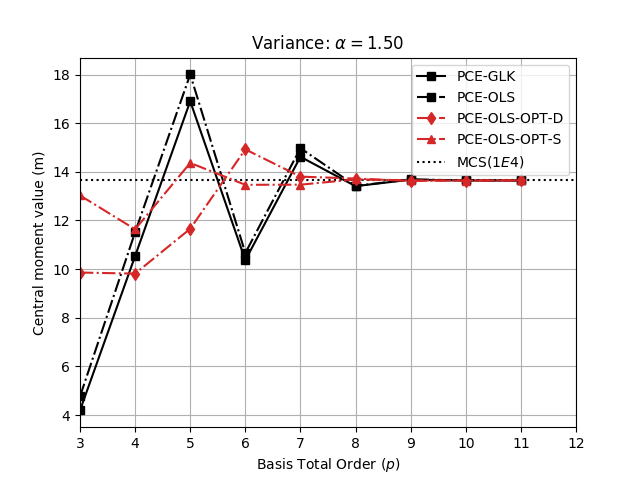

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


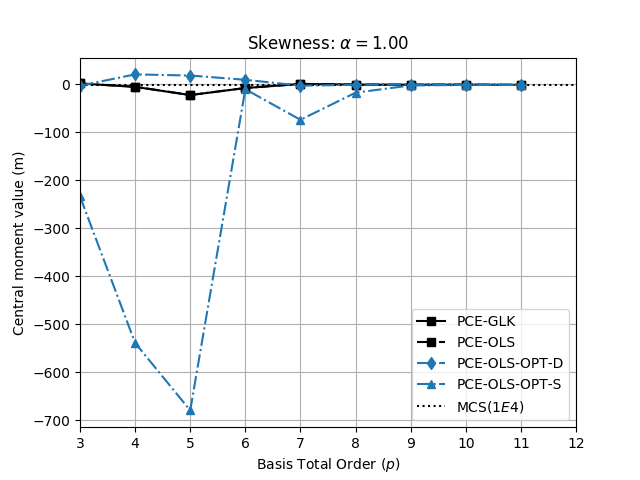

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


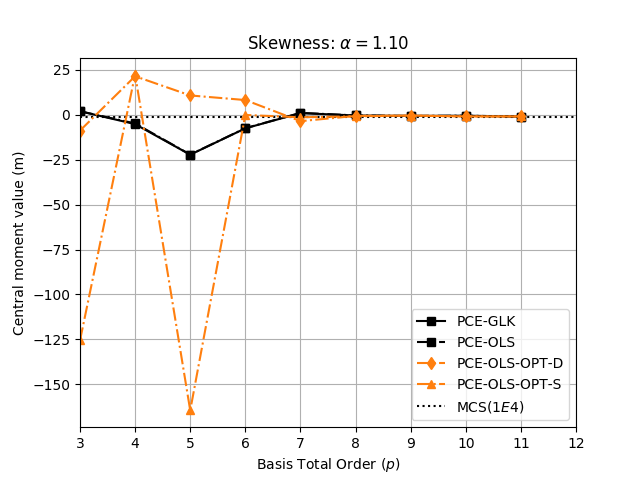

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


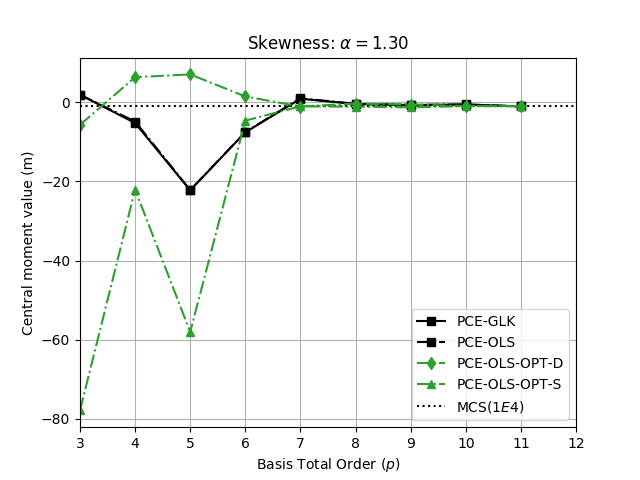

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


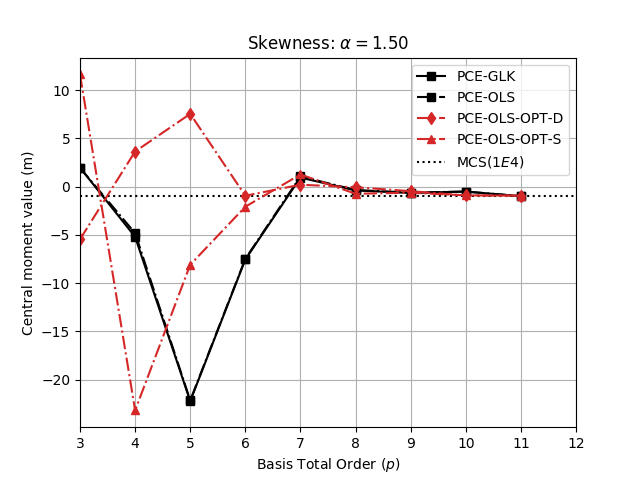

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


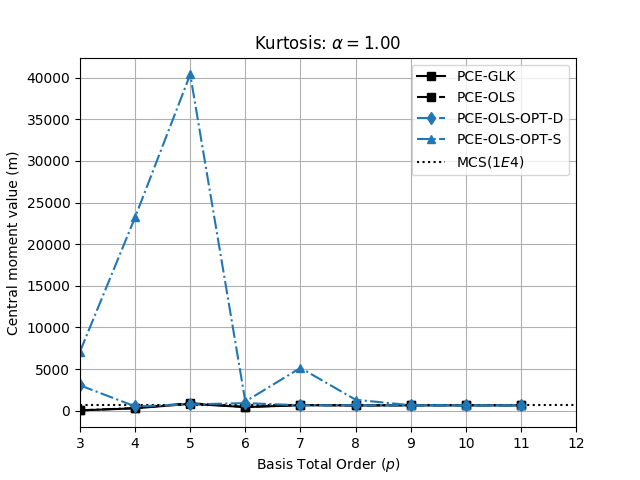

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


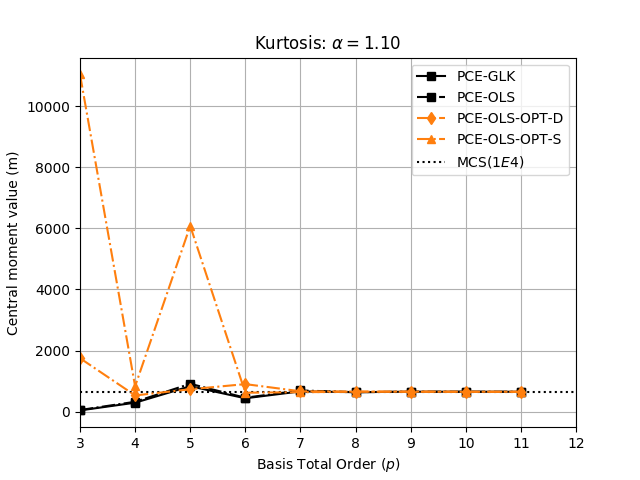

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


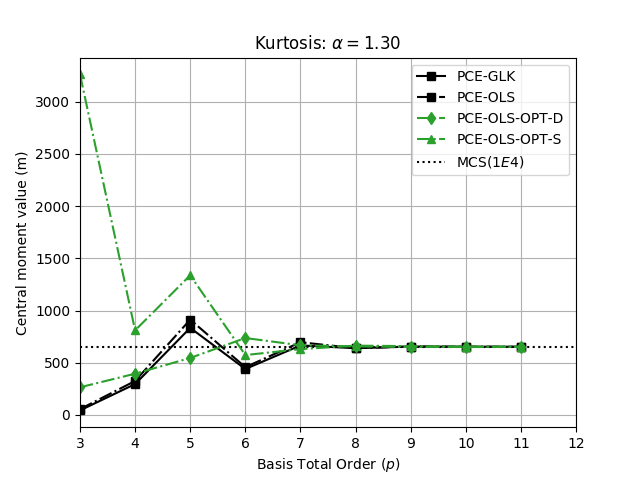

(9, 9, 4)
(9, 9, 4)


<IPython.core.display.Javascript object>


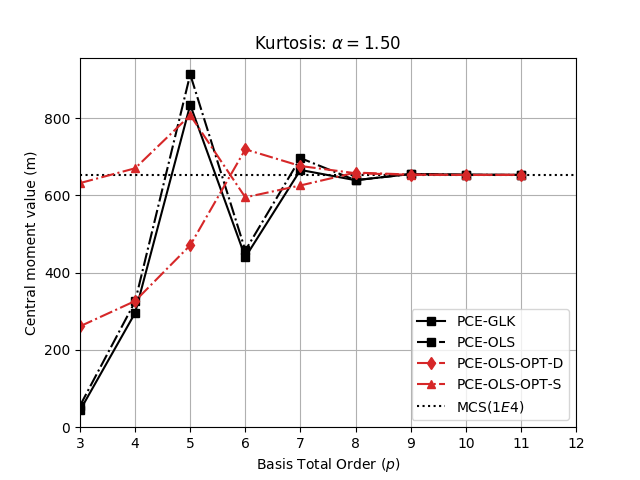

(9, 9, 4)
(9, 9, 4)


In [478]:
moments_names = ['Mean', 'Variance', 'Skewness', 'Kurtosis']

for j, jmoments_names in enumerate(moments_names):
    for i, ia in enumerate(alpha[:4]):
        fig = plt.figure()
        plt.hlines(moments_mcs[j], xlim[0],xlim[-1], 'k',linestyles=':', label='MCS($1E4$)')
        plt.plot(DoE_quad_orders, moments_quad_pce_glk[j], 'sk-', label='PCE-GLK')    
        plt.plot(DoE_quad_orders, moments_quad_pce_ols[j], 'sk-.', label='PCE-OLS')
        
        moments_optD_pce_ols_mean = np.mean(moments_optD_pce_ols, axis=0)
        print(moments_optD_pce_ols_mean.shape)
        plt.plot(DoE_quad_orders, np.squeeze(moments_optD_pce_ols_mean[:,i,j]), 'd-.', color=pltcolors[i], label=r'PCE-OLS-OPT-D')

        moments_optS_pce_ols_mean = np.mean(moments_optS_pce_ols, axis=0)
        print(moments_optS_pce_ols_mean.shape)
        plt.plot(DoE_quad_orders, np.squeeze(moments_optS_pce_ols_mean[:,i,j]), '^-.', color=pltcolors[i], label=r'PCE-OLS-OPT-S')

        plt.xlabel('Basis Total Order ($p$)')
        plt.ylabel(r'Central moment value (m)')
        plt.title(r'{:s}: $\alpha={:.2f}$'.format(jmoments_names, ia))
        plt.xlim(xlim)
        plt.grid()
        plt.legend(loc=0)
        
        

In [321]:
filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_p3_OptD11.npy')
data_set = np.load(filename)
# np.save(filename, data_set[3:6,:])
# print(np.std(data_set, axis=1))
print(data_set.shape)

(8, 11)


<IPython.core.display.Javascript object>


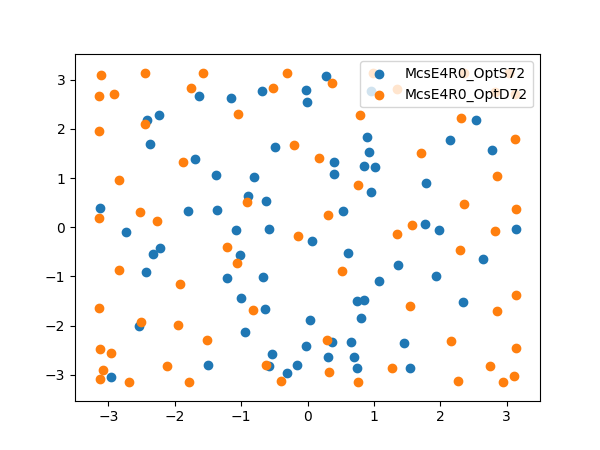

(3, 72)
(3, 72)


In [287]:
fig = plt.figure(figsize=figsize)
ax  = fig.add_subplot(1,1,1)
filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptS72_p10_x.npy')
mcs_x = np.load(filename)
ax.scatter(mcs_x[0,:],mcs_x[1,:],label='McsE4R0_OptS72')
print(mcs_x.shape)
filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptD72_p10_x.npy')
lhs_x = np.load(filename)
ax.scatter(lhs_x[0,:],lhs_x[1,:],label='McsE4R0_OptD72')
print(lhs_x.shape)
plt.legend()

In [290]:
filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptS72_p10_I.npy')
data_set = np.load(filename)
print(data_set)

filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptS85_p10_I.npy')
data_set = np.load(filename)
print(data_set)

filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptS99_p10_I.npy')
data_set = np.load(filename)
print(data_set)


filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptD72_p10_I.npy')
data_set = np.load(filename)
print(data_set)

filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptD85_p10_I.npy')
data_set = np.load(filename)
print(data_set)

filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R0_OptD99_p10_I.npy')
data_set = np.load(filename)
print(data_set)

[   0    1    2    3    4    5   12   44   49   56   75   83  105  111
  113  196  221  227  252  267  284  306  350  400  441  624  673  759
  807  826  876 1037 1205 1212 1655 1702 2025 2135 2139 2317 2443 2598
 2763 3402 3480 3761 3803 3952 4108 4426 4490 4612 4817 4840 5126 5357
 5640 5677 5944 6826 6999 7463 7594 7784 7957 8044 8832 8988 9405 9433
 9454 9660]
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   25   48   54   85  116  134  144  197
  209  326  402  421  529  542  560  656  717  786  849  897 1153 1314
 1932 2300 2467 2804 3087 3196 3289 3295 3440 3659 3998 4028 4137 4223
 4373 4750 4840 4845 5081 5160 5526 5597 5712 6109 6546 6804 6863 6936
 7028 7135 7186 7594 7600 7960 8213 8263 8725 8726 9040 9059 9163 9360
 9562]
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   58  121  211  247  4

In [286]:
np.polynomial.hermite_e.hermegauss(4)

(array([-2.33441422, -0.74196378,  0.74196378,  2.33441422]),
 array([0.11499371, 1.13832042, 1.13832042, 0.11499371]))

<IPython.core.display.Javascript object>


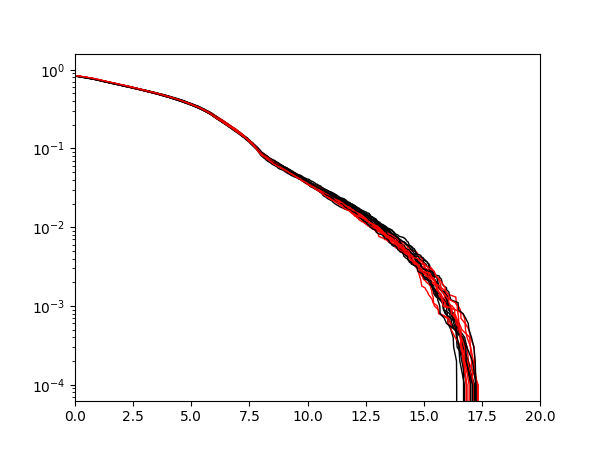

In [282]:
fig = plt.figure(figsize=figsize)
ax  = fig.add_subplot(1,1,1)
mcs_ecdf_x = []
for r in range(10):
    filename = os.path.join(MODEL_DIR_DATA, 'DoE_McsE4R{:d}_y_ecdf.npy'.format(r))
    mcs_ecdf = np.load(filename)
    ax.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],'-',color='k',linewidth=1)
    
    filename = os.path.join(MODEL_DIR_DATA, 'DoE_LhsE4R{:d}_y_ecdf.npy'.format(r))
    mcs_ecdf = np.load(filename)
    ax.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],'-',color='r',linewidth=1)
    ax.set_xlim(0,20)    


In [267]:
DoE_quad_orders = range(3,11)

ecdf_quad_pce_ols = []
ecdf_quad_pce_glk = []

for i, iquad_order in enumerate(DoE_quad_orders):
    filename = os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg{:d}_PCE_GLK_valid_y_ecdf_pf5.npy'.format(iquad_order))
    data_set = np.load(filename)
    ax.semilogy(data_set[0,:], 1-data_set[-1,:],'-.',color=pltcolors[i],linewidth=1, label='Order p={:d}'.format(iquad_order))
    filename = os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg{:d}_PCE_OLS_valid_y_ecdf_pf5.npy'.format(iquad_order))
    data_set = np.load(filename)
    ax.semilogy(data_set[0,:], 1-data_set[-1,:],color=pltcolors[i],linewidth=1)
#     print(data_set.shape)
#     filename = os.path.join(MODEL_DIR_DATA, 'DoE_Quad_Leg{:d}_PCE_GLK_valid_y_ecdf_pf5.npy'.format(iquad_order))
#     data_set = np.load(filename)
#     print(data_set.shape)
plt.xlabel(r'$y=f(x)$: Ishigami')
plt.ylabel(r'Exceedance probability: $\mathcal{P}(Y>y)$')
plt.grid()
plt.legend()

In [8]:
from scipy.stats.mstats import mquantiles
a = np.array([6., 47., 49., 15., 42., 41., 7., 39., 43., 40., 36.])
mquantiles(a, prob=0.5)

array([40.])

In [18]:
from scipy.stats import moment
a = moment([1, 2, 3, 4, 5], moment=[1,2])

a.size

2

In [22]:
random = [5, 9, 'cat']

# converting list to iterator
randomIterator = iter(random)
a = next(randomIterator)
print(a)

5


<IPython.core.display.Javascript object>


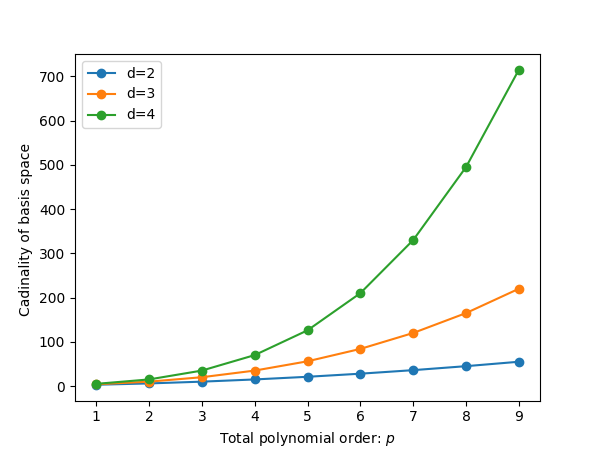

<IPython.core.display.Javascript object>


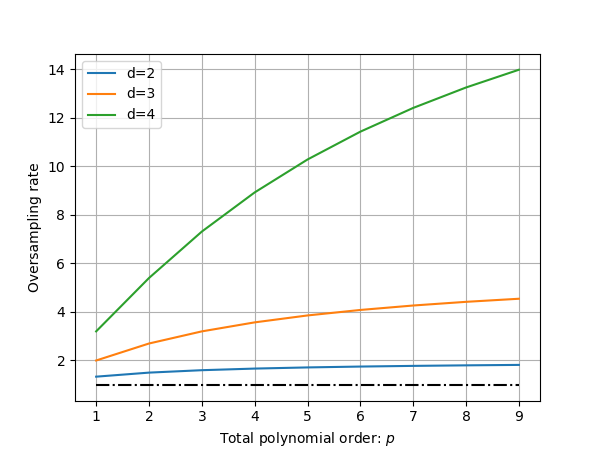

In [343]:
p = np.arange(1,10, dtype=np.float64)
d = np.arange(2,5, dtype=np.float64)
pp, dd = np.meshgrid(p,d)
P = np.zeros((len(d), len(p)))
r = np.zeros(pp.shape, dtype=np.float64)
for i in range(len(d)):
    for j in range(len(p)):
        ipp = pp[i,j]
        idd = dd[i,j]
        P[i,j] = math.factorial(idd+ipp)/ (math.factorial(idd) * math.factorial(ipp))
        r[i,j] = (ipp+1)**idd / P[i,j]

        
        
fig = plt.figure(figsize=figsize)

for i, idd in enumerate(d):
    plt.plot(p, P[i,:],marker='o',label='d={:d}'.format(int(idd)))
    plt.legend()
plt.xlabel('Total polynomial order: $p$')    
plt.ylabel('Cadinality of basis space ')
    
    
fig = plt.figure(figsize=figsize)
plt.plot(p, p/p,'k-.')
for i, idd in enumerate(d):
    plt.plot(p, r[i,:],label='d={:d}'.format(int(idd)))
# sc  = plt.scatter(dd, pp, c=r)
# plt.colorbar(sc)
plt.ylabel('Oversampling rate')
plt.xlabel('Total polynomial order: $p$')
# plt.title('Ratio= $(p+1)^d/P$')
# plt.xlim(0.5,10.5)
# plt.ylim(0.5,30.5)
plt.legend()
plt.grid()


In [6]:
c = np.array([[ 1, 2, 3],
              [-1, 1, 4]])
d = LA.norm(c, axis=0)
print(d.shape)

(3,)


In [12]:
a = np.polynomial.hermite.Hermite.basis(4)
print(type(a))

<class 'numpy.polynomial.hermite.Hermite'>


[[ 0.08680988 -0.44326123 -0.15096482 ... -0.70641422  0.6998739
  -0.92538496]
 [-0.08573241  0.82033865 -0.22180813 ...  0.68121294  0.76240948
   0.15390048]]


<IPython.core.display.Javascript object>


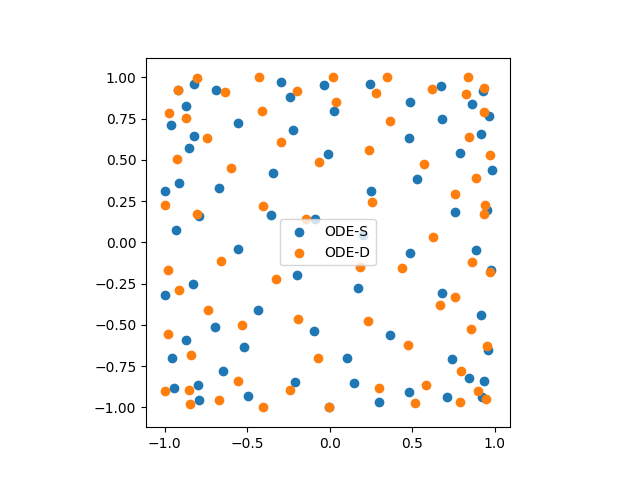

In [188]:
mcs_x   = np.load('Uniform2D_MCSR_x_72.npy')
odeS_x  = np.load('Uniform2D_ODES_x_72.npy')
odeD_x  = np.load('Uniform2D_ODED_x_72.npy')

print(mcs_x)
fig = plt.figure()
# plt.scatter(mcs_x[0],mcs_x[1], alpha=0.5, s=10,label='MCS')
plt.scatter(odeS_x[0],odeS_x[1], label='ODE-S')
plt.scatter(odeD_x[0],odeD_x[1], label='ODE-D')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')


In [63]:
x_p = np.load('Uniform_quasi_opt_x_p.npy')
X_p = np.load('Uniform_quasi_opt_X1_p.npy')
indices_p = np.load('Uniform_quasi_opt_indices_p.npy')

x1 = np.load('Uniform_quasi_opt_x_61.npy')
X1 = np.load('Uniform_quasi_opt_X1_61.npy')
indices1 = np.load('Uniform_quasi_opt_indices_61.npy')

x2 = np.load('Uniform_quasi_opt_x_100.npy')
X2 = np.load('Uniform_quasi_opt_X1_100.npy')
indices2 = np.load('Uniform_quasi_opt_indices_100.npy')

x3 = np.load('Uniform_quasi_opt_x.npy')
X3 = np.load('Uniform_quasi_opt_X1.npy')
indices3 = np.load('Uniform_quasi_opt_indices.npy')

In [66]:
cdf_asym_x = np.linspace(-1,1,100)
cdf_asym_F = 2/np.pi * np.arcsin(np.sqrt((cdf_asym_x + 1 ) / 2))
cdf_norm_F = norm.cdf(cdf_asym_x)
ecdf_x_p = ECDF(x_p)
ecdf_x1 = ECDF(x1)
ecdf_x2 = ECDF(x2)
ecdf_x3 = ECDF(x3)
print(dir(ecdf_x))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'n', 'side', 'x', 'y']


<IPython.core.display.Javascript object>


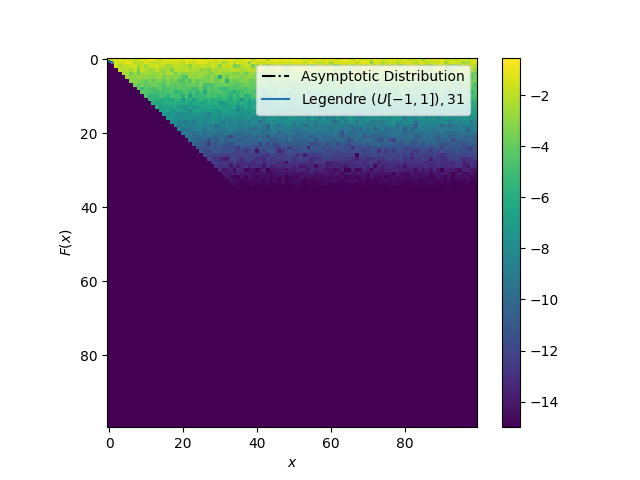

In [70]:
fig = plt.figure()
plt.plot(cdf_asym_x, cdf_asym_F, 'k-.',label='Asymptotic Distribution')
# plt.plot(cdf_asym_x, cdf_norm_F, 'r-.',label='Normal Distribution')
plt.plot(ecdf_x_p.x, ecdf_x_p.y, label='Legendre $(U[-1,1]),31$')
# plt.plot(ecdf_x1.x, ecdf_x1.y, label='Legendre $(U[-1,1]),61$')
# plt.plot(ecdf_x2.x, ecdf_x2.y, label='Legendre $(U[-1,1]),100$')
# plt.plot(ecdf_x3.x, ecdf_x3.y, label='Legendre $(U[-1,1]),100$')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend()


In [71]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt

In [72]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0).dot(VT0) - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)

2.1146388303022047e-13


In [87]:
Q, R, perm = la.qr(A, pivoting=True)
print(perm)
print(np.round(A[:5,:5],4))

[52 36 90 24 97  5 92 99  3 11 87 35 76 74 13 56 79 91 17 48 85  0 44 47
 12 33 10 65 22 63 64 58 88 23 27 62 37 69 89 80  1 38 53 54 39 84 83 82
 78 34 43  4 77 72 45  8 57 46 30  7 49 66 51 21 86 93 20 70 94 14 29 98
 28 31  6 95 50  2  9 96 71 55 41 68 60 32 67 18 59 25 42 61 19 15 73 75
 81 40 16 26]
[[-0.0052  0.0003 -0.0001 -0.0012 -0.0028]
 [-0.0691 -0.0369 -0.0179  0.0044 -0.042 ]
 [ 0.0002  0.0035  0.0021 -0.0012 -0.0002]
 [ 0.0484  0.0256  0.0148 -0.0026  0.0297]
 [ 0.0072  0.0078 -0.0039 -0.0022  0.0028]]


In [91]:
la.norm(A[:, perm] - Q.dot(R), 2)
print(np.round(A[:5,perm[:5]],4))

[[-0.0006 -0.0057 -0.0006  0.0047 -0.0006]
 [-0.0951  0.0098 -0.009   0.0412  0.0122]
 [ 0.0078 -0.0074 -0.0049 -0.0007 -0.0049]
 [ 0.068  -0.0062  0.0053 -0.0283 -0.0092]
 [ 0.0124 -0.0096  0.0002 -0.0071 -0.0049]]


In [75]:
la.norm(Q.dot(Q.T) - np.eye(n))


7.883465961139795e-15

<IPython.core.display.Javascript object>


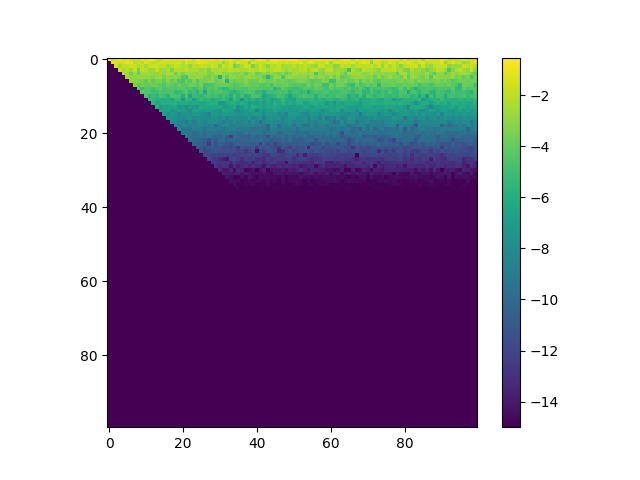

In [83]:
plt.figure()
pt.imshow(np.log10(1e-15+np.abs(R)))
pt.colorbar()

<IPython.core.display.Javascript object>


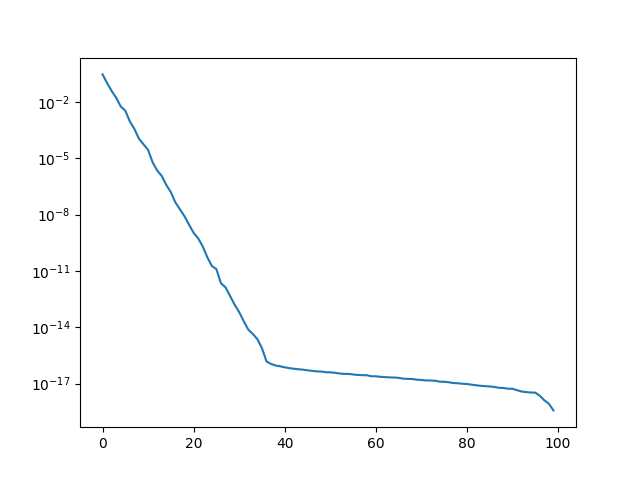

In [82]:
plt.figure()
pt.semilogy(np.abs(np.diag(R)))
